In [2]:
import getdist
import numpy as np
from getdist import loadMCSamples, MCSamples
from getdist import plots
import os
import matplotlib.pyplot as plt
from classy_sz import Class as Class_sz
# print(os.listdir('/Users/licongxu/Desktop/chains_fg'))

In [3]:
%%time
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,
}

# initialize computation
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':' ',
'jax': 1,
})
classy_sz.compute_class_szfast()

CPU times: user 642 ms, sys: 47.9 ms, total: 690 ms
Wall time: 736 ms


In [4]:
# Define chain directory
# chain_dir = r'/Users/licongxu/Work/tszpower/chains/tszpower_chain'
chain_dir = r'/Users/licongxu/Desktop/chains_full_run1/tszpower_chain'

# Load MCMC samples
readsamps = loadMCSamples(chain_dir)
p = readsamps.getParams()
print('Adding derived parameters')

# Compute sigma8 for each sample
sigma8_values = []
for ln10_10A_s in p.ln10_10A_s:
    A_s_dict = {'ln10^{10}A_s': ln10_10A_s}
    sigma8 = classy_sz.get_sigma8_and_der(params_values_dict=A_s_dict)[1]  # Compute sigma8
    sigma8_values.append(sigma8)

# Convert list to numpy array
sigma8_values = np.array(sigma8_values)

# Add derived parameters to MCMC samples
readsamps.addDerived(sigma8_values, name='sigma8', label=r'\sigma_8')
# Compute derived parameter: ln(1/A_rs)
ln_1_A_rs = np.log(1.0 / p.A_rs)

# Add derived parameter to samples
readsamps.addDerived(ln_1_A_rs, name='ln_1_A_rs', label=r'\ln(1/A_\mathrm{rs})')
print("Derived parameters added successfully.")

Adding derived parameters
Derived parameters added successfully.


In [5]:
# Compute h and Omega_m for each sample
h = p.H0 / 100.0  # Compute h

# Add F as a derived parameter
readsamps.addDerived(h, name='h', label=r'h')

# **Force GetDist to recognize the new parameter**
readsamps.updateBaseStatistics()

print("Derived parameter h added successfully.")


Derived parameter h added successfully.


In [6]:
omega_b = 0.0224
Omega_m = (p.omega_cdm + omega_b) / h**2  # Compute Omega_m

# Add F as a derived parameter
readsamps.addDerived(Omega_m, name='Omegam', label=r'\Omega_m')

# **Force GetDist to recognize the new parameter**
readsamps.updateBaseStatistics()

print("Derived parameter Omegam added successfully.")


Derived parameter Omegam added successfully.


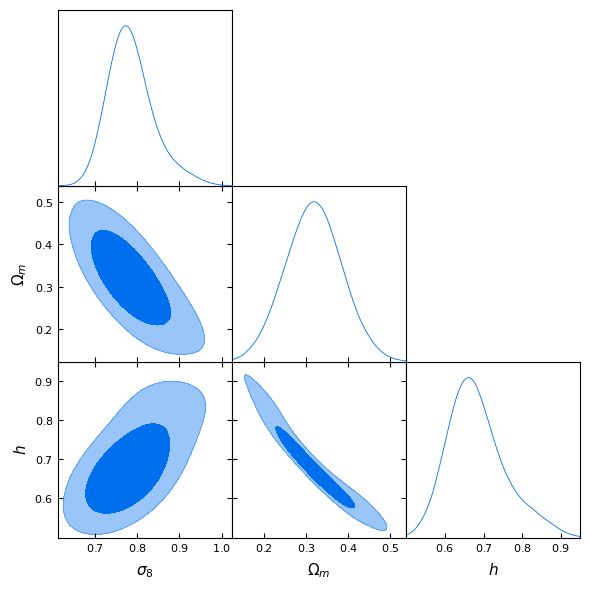

In [11]:
# Define parameters to plot
params_to_plot = ['sigma8', 'Omegam', 'h']

# Create a triangle plot (corner plot)
g = plots.get_subplot_plotter()
g.triangle_plot(readsamps, params_to_plot, filled=True)

# # Adjust axis limits for specific parameters
# g.subplots[0, 0].set_xlim(0.70, 0.96)  
# g.subplots[1, 1].set_xlim(0.2, 0.36) 
# g.subplots[2, 2].set_xlim(0.6, 0.85)  


# Show the plot
plt.show()

In [8]:
# import numpy as np
# import matplotlib.pyplot as plt
# from getdist.mcsamples import loadMCSamples
# from getdist import plots

# # Define chain directory
# chain_dir = r'/Users/licongxu/Desktop/chains_fg/tszpower_chain'

# # Load MCMC samples
# readsamps = loadMCSamples(chain_dir)
# p = readsamps.getParams()

# print('Adding derived parameters')

# # Compute derived parameter: ln(1/A_rs)
# ln_1_A_rs = np.log(1.0 / p.A_rs)

# # Add derived parameter to samples
# readsamps.addDerived(ln_1_A_rs, name='ln_1_A_rs', label=r'\ln(1/A_\mathrm{rs})')

# # Define parameters to analyze
# params_to_fit = ['B', 'A_cib', 'A_rs', 'A_ir']

# # Get the sample with the highest posterior probability (best fit)
# log_likelihoods = readsamps.loglikes  # Log-likelihoods from samples
# best_fit_index = np.argmax(log_likelihoods)  # Find index of max log-likelihood

# # Extract best-fit values
# best_fit_params = {param: readsamps.samples[best_fit_index, readsamps.index[param]] for param in params_to_fit}

# # Print best-fit parameters
# print("\nBest-Fit Parameters (Maximum Posterior Sample):")
# for param, value in best_fit_params.items():
#     print(f"{param}: {value:.5f}")
